In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import re

In [4]:
cfb_realignment = pd.read_csv("../data/FBConference_Realignment.csv")

In [5]:
cfb_realignment.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,AP Pre_Prev Conf,AP High Prev Conf,AP Post Prev Conf,AP Pre Current Conf,AP High Current Conf,AP Post Current Conf,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,NaN,13.0,13.0,NaN,18.0,22.0,-3.25,1.16,4.41,Group of 5
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.58,-2.22,-0.64,Group of 5
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,NaN,NaN,NaN,NaN,19.0,19.0,0.03,-0.90,-0.93,Independent
3,Boise State,Big West/WAC,Mountain West,2011,10,16,4,20,0,0,...,3.0,2.0,4.0,5.0,4.0,8.0,-0.70,2.02,2.72,Group of 5
4,Boston College,Big East,ACC,2005,16,1,0,1,1,0,...,NaN,17.0,21.0,22.0,2.0,10.0,3.19,7.08,3.89,Power 5


In [6]:
cfb_realignment.info

<bound method DataFrame.info of                     School                      Previous Conference(s)  \
0                Air Force                                         WAC   
1           Arkansas State               Big West/Independent/Big West   
2                     Army                              Conference USA   
3              Boise State                                Big West/WAC   
4           Boston College                                    Big East   
5                      BYU                           WAC/Mountain West   
6               Cincinnati                     Conference USA/Big East   
7                 Colorado                                      Big-12   
8           Colorado State                                         WAC   
9            East Carolina                              Conference USA   
10            Fresno State                                Big West/WAC   
11        Florida Atlantic                                    Sun Belt   
12   F

In [7]:
cfb_realignment.shape

(60, 47)

In [8]:
cfb_realignment.describe()

,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,Unclaimed National Titles,Total National Titles,W_Overall,...,Bowl Games Attended Current Conf,AP Pre_Prev Conf,AP High Prev Conf,AP Post Prev Conf,AP Pre Current Conf,AP High Current Conf,AP Post Current Conf,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,21.000000,38.000000,30.000000,18.000000,40.000000,31.000000,60.000000,60.000000,60.000000
mean,2009.783333,11.166667,11.083333,0.983333,12.066667,0.600000,0.016667,0.433333,0.616667,137.283333,...,5.783333,11.666667,10.421053,11.600000,13.888889,12.250000,14.741935,0.599500,1.894333,1.294833
std,5.627088,5.678287,9.535468,1.545816,9.563112,1.575232,0.129099,1.406603,1.574066,44.695236,...,3.710232,7.185634,8.012259,7.223525,7.242756,7.142326,6.845766,3.649295,3.657157,2.992479
min,1999.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,-8.830000,-4.040000,-6.070000
25%,2005.000000,8.000000,3.750000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,109.000000,...,3.000000,6.000000,3.000000,5.250000,7.250000,5.000000,9.000000,-1.597500,-1.007500,-0.877500
50%,2012.500000,8.500000,10.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,137.500000,...,6.000000,10.000000,8.000000,11.000000,14.500000,14.500000,15.000000,0.060000,1.585000,1.420000
75%,2013.000000,16.000000,15.250000,1.000000,17.250000,0.000000,0.000000,0.000000,0.000000,169.750000,...,8.000000,17.000000,16.000000,17.500000,21.250000,18.000000,20.000000,3.327500,4.555000,3.282500
max,2020.000000,22.000000,46.000000,6.000000,46.000000,9.000000,1.000000,8.000000,9.000000,247.000000,...,17.000000,24.000000,25.000000,24.000000,24.000000,25.000000,25.000000,8.740000,9.780000,9.020000


In [9]:
cfb_realignment.corr

<bound method DataFrame.corr of                     School                      Previous Conference(s)  \
0                Air Force                                         WAC   
1           Arkansas State               Big West/Independent/Big West   
2                     Army                              Conference USA   
3              Boise State                                Big West/WAC   
4           Boston College                                    Big East   
5                      BYU                           WAC/Mountain West   
6               Cincinnati                     Conference USA/Big East   
7                 Colorado                                      Big-12   
8           Colorado State                                         WAC   
9            East Carolina                              Conference USA   
10            Fresno State                                Big West/WAC   
11        Florida Atlantic                                    Sun Belt   
12   F

In [10]:
print(cfb_realignment.dtypes)

School                                            object
Previous Conference(s)                            object
Current Conference                                object
Year Joined Current Conference                     int64
Years in Current Conference                        int64
Conference Titles in Previous Conference(s)        int64
Conference Titles in Current Conference            int64
Total Conference Titles                            int64
National Titles Before Joining New Conference      int64
National Titles Since Joining New Conference       int64
Unclaimed National Titles                          int64
Total National Titles                              int64
W_Overall                                          int64
L_Overall                                          int64
T_Overall                                          int64
W_Prev_Conf                                        int64
L_Prev_Conference                                  int64
T_Prev_Conference              

Let's look at some general stats

In [11]:
cfb_realignment.W_Overall.sum()

8237

In [12]:
cfb_realignment.W_Overall.mean()

137.28333333333333

In [18]:
cfb_realignment.W_Overall.min()

20

In [19]:
cfb_realignment.W_Overall.max()

247

In [13]:
cfb_realignment.L_Overall.sum()

8366

In [14]:
cfb_realignment.L_Overall.mean()

139.43333333333334

In [20]:
cfb_realignment.L_Overall.min()

58

In [21]:
cfb_realignment.L_Overall.max()

201

In [15]:
8237/8366

0.9845804446569448

Teams that have switched conferences since the BCS era have a total win percentage of .985 (Rounded to the Nearest Thousand). Teams have switched conferences have an average of 137 total wins since the start of the BCS Era 1998.

In [17]:
cfb_realignment.W_Prev_Conf.sum()

3805

In [22]:
cfb_realignment.W_Prev_Conf.mean()

63.416666666666664

In [23]:
cfb_realignment.W_Prev_Conf.min()

0

In [24]:
cfb_realignment.W_Prev_Conf.max()

140

In [26]:
cfb_realignment.L_Prev_Conference.sum()

3771

In [27]:
cfb_realignment.L_Prev_Conference.mean()

62.85

In [28]:
cfb_realignment.L_Prev_Conference.min()

1

In [29]:
cfb_realignment.L_Prev_Conference.max()

170

In [30]:
3805/3771

1.0090161760806151

Teams that have switched conferences since the BCS era have a toal win percentage in their previous conference(s) of 1.009 (Rounded to the Nearest Thousand). Teams have switched conferences have an average of 63 total wins in their previous conference(s).

In [31]:
cfb_realignment.W_Current_Conf.sum()

4432

In [32]:
cfb_realignment.W_Current_Conf.mean()

73.86666666666666

In [33]:
cfb_realignment.W_Current_Conf.min()

1

In [34]:
cfb_realignment.W_Current_Conf.max()

160

In [35]:
cfb_realignment.L_Current_Conf.sum()

4595

In [36]:
cfb_realignment.L_Current_Conf.mean()

76.58333333333333

In [37]:
cfb_realignment.L_Current_Conf.min()

11

In [38]:
cfb_realignment.L_Current_Conf.max()

190

In [39]:
4432/4595

0.9645266594124048

Teams that have switched conferences since the BCS era have a toal win percentage in their current conference(s) of .965 (Rounded to the Nearest Thousand). Teams have switched conferences have an average of 74 total wins in their current conference.

What year did most of the realignment take place?

In [40]:
year_joined = pd.DataFrame(cfb_realignment['Year Joined Current Conference'].value_counts().reset_index())
year_joined

,index,Year Joined Current Conference
0,2013,18
1,2014,8
2,1999,7
3,2012,7
4,2005,5
5,2011,5
6,2001,3
7,2004,3
8,2015,1
9,2018,1


In [41]:
year_joined.columns = ['Year', 'Teams That Switched Conferences']
year_joined

,Year,Teams That Switched Conferences
0,2013,18
1,2014,8
2,1999,7
3,2012,7
4,2005,5
5,2011,5
6,2001,3
7,2004,3
8,2015,1
9,2018,1


2013 had the most teams switch conferences since the BCS Era. Now let's graph the top 5 years.

In [42]:
top5_years = year_joined.nlargest(5,'Teams That Switched Conferences')
top5_years.head()

,Year,Teams That Switched Conferences
0,2013,18
1,2014,8
2,1999,7
3,2012,7
4,2005,5


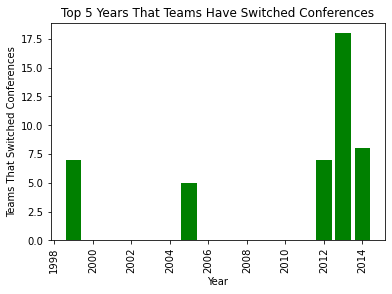

In [43]:
plt.bar(top5_years.Year,top5_years['Teams That Switched Conferences'], color='green')
plt.title('Top 5 Years That Teams Have Switched Conferences')
plt.xlabel('Year')
plt.ylabel('Teams That Switched Conferences')
plt.xticks(rotation = 90)
plt.show()

Let's look at Bowl Game Qualifications

In [44]:
cfb_realignment['Bowl Games Total'].nlargest(10)

56    23
23    20
58    20
3     19
5     19
19    19
40    19
42    19
52    18
4     17
Name: Bowl Games Total, dtype: int64

Let's make an execel workbook for the dataframes we've created

In [ ]:
#xlwriter = pd.ExcelWriter('Conference_RealignmentFB.xlsx')  
#year_joined.to_excel(xlwriter, sheet_name='Year_Joined_Current_Conference')